<a href="https://colab.research.google.com/github/Fauzih526/uasBengkod/blob/main/UASBengkod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#masukkan data
import pandas as pd
df = pd.read_csv('ObesityDataSet.csv')
display(df.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
#menampilkan jumlah kolom dan baris
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah baris: 2111
Jumlah kolom: 17


In [ ]:
#menampilkan deskripsi data
print(df.describe())

         Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             351  


In [ ]:
#menampilkan tipe data
print(df.dtypes)

Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [ ]:
#menampilkan missing values
print(df.isnull().sum())

Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
#menampilkan unique values
print(df.nunique())

Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [ ]:
#menampilkan data duplikat
print(df.duplicated().sum())

18


In [ ]:
#menampilkan keseimbangan data
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


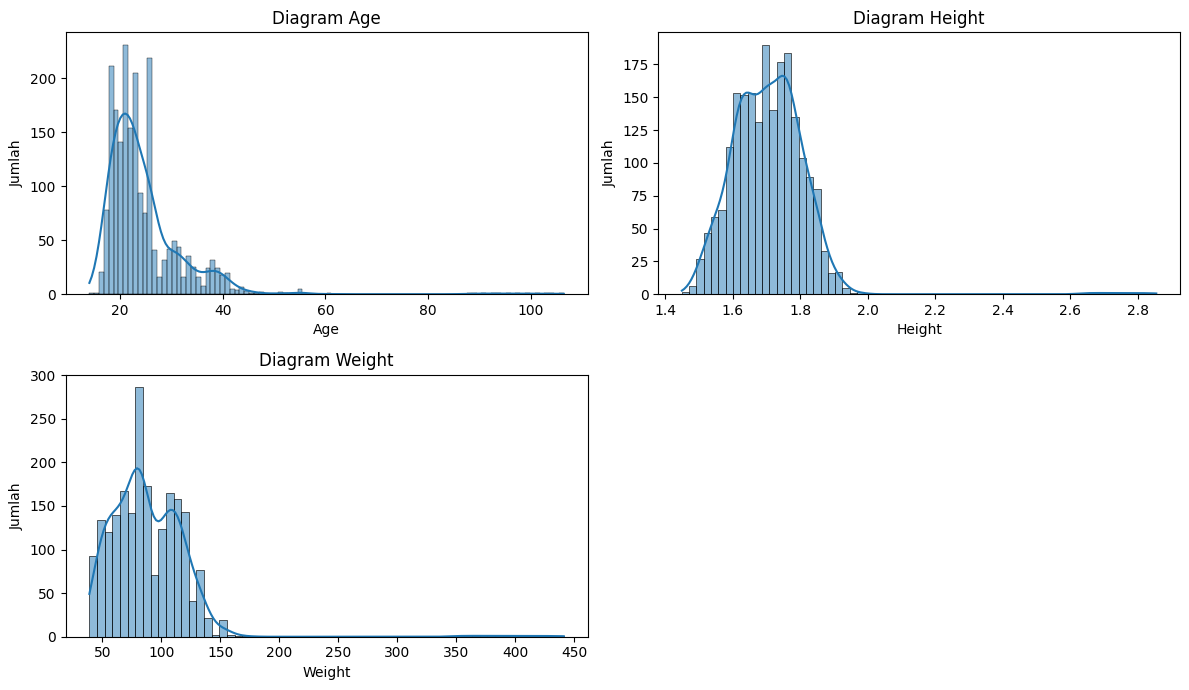

In [ ]:
#menampilkan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['Age', 'Height', 'Weight']:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except KeyError:
        print(f"Column '{col}' not found in DataFrame.")

plt.figure(figsize=(12, 7))
for i, col in enumerate(['Age', 'Height', 'Weight']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Diagram {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

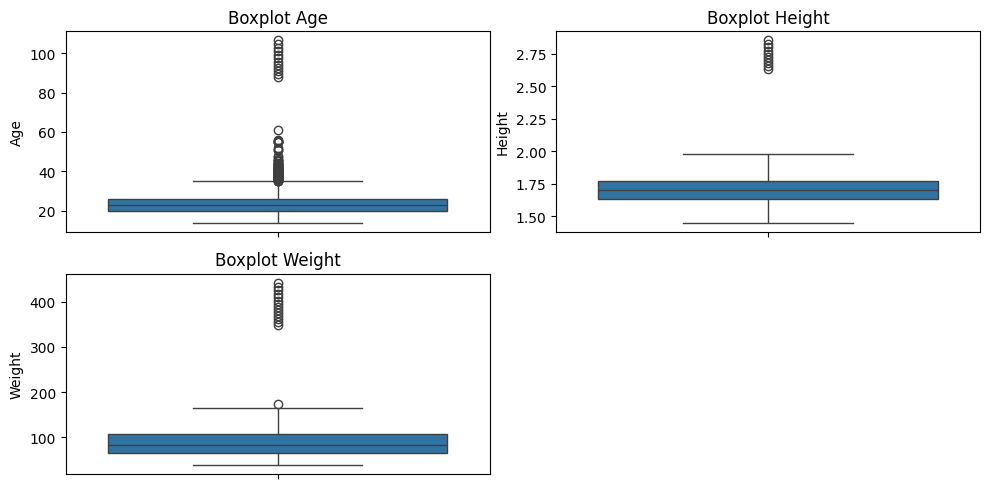

In [ ]:
#menampilkan deteksi outlier dengan boxplot
plt.figure(figsize=(10, 5))
numerical_features = ['Age', 'Height', 'Weight',]
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [ ]:
#menangani Missing Values
numerical_cols = ['Age', 'Height', 'Weight']
for col in numerical_cols:
  if df[col].isnull().sum() > 0:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"Filled missing values in '{col}' with median: {median_val}")

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  if df[col].isnull().sum() > 0:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"Filled missing values in '{col}' with mode: {mode_val}")

#cek Missing Values
print("\nMissing values after handling:")
print(df.isnull().sum())

#menangani duplikat
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)
  print(f"\nRemoved {df.duplicated().sum()} duplicate rows.")
else:
  print("\nNo duplicate rows found.")

#menangani Outliers
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  if not outliers.empty:
    print(f"\nOutliers found in '{col}':")
    print(outliers[[col]])
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped {len(outliers)} outliers in '{col}'.")
  else:
    print(f"\nNo outliers found in '{col}'.")

print("\nData cleaning complete.")
print("\nDataFrame info after cleaning:")
df.info()

Filled missing values in 'Age' with median: 22.814657
Filled missing values in 'Height' with median: 1.701284
Filled missing values in 'Weight' with median: 83.0
Filled missing values in 'Gender' with mode: Male
Filled missing values in 'CALC' with mode: Sometimes
Filled missing values in 'FAVC' with mode: yes
Filled missing values in 'FCVC' with mode: 3
Filled missing values in 'NCP' with mode: 3
Filled missing values in 'SCC' with mode: no
Filled missing values in 'SMOKE' with mode: no
Filled missing values in 'CH2O' with mode: 2
Filled missing values in 'family_history_with_overweight' with mode: yes
Filled missing values in 'FAF' with mode: 0
Filled missing values in 'TUE' with mode: 0
Filled missing values in 'CAEC' with mode: Sometimes
Filled missing values in 'MTRANS' with mode: Public_Transportation

Missing values after handling:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC 

In [ ]:
from sklearn.preprocessing import LabelEncoder

#cek data kategorikal
categorical_cols = df.select_dtypes(include='object').columns

#ubah kategorikal ke numerik
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

#cek hasil
display(df.head())

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1,1.62,64.0,4,1,167,479,1,1,545,2,0,832,3,4,1
1,21.0,1,1.52,56.0,3,1,798,479,2,2,1253,2,1180,0,3,4,1
2,23.0,2,1.80,77.0,2,1,167,479,1,1,545,2,1063,832,3,4,1
3,27.0,2,1.80,87.0,2,1,798,479,1,1,545,1,1063,0,3,5,5
4,22.0,2,1.78,89.8,3,1,167,0,1,1,545,1,0,0,3,4,6


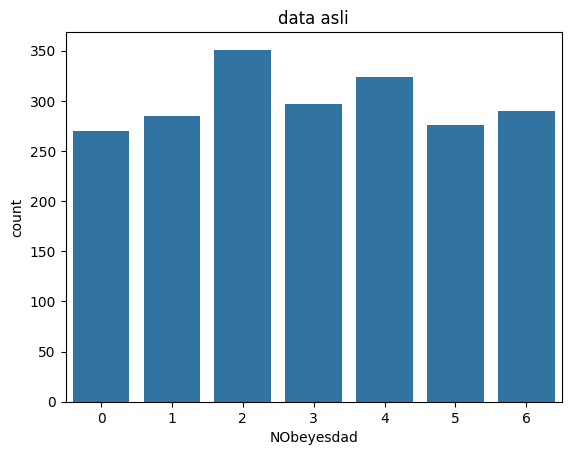

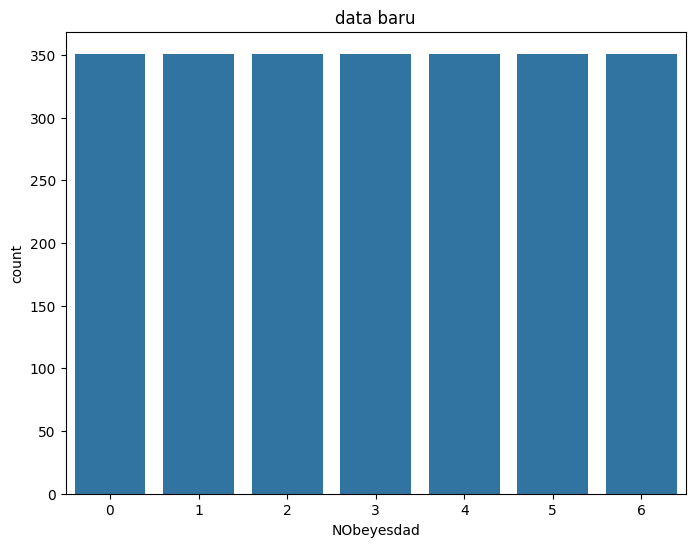

data asli: (2093, 17)
data baru: (2457, 17)


In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

#tampilkan data sebelum diubah
sns.countplot(x='NObeyesdad', data=df)
plt.title('data asli')
plt.show()

#memisahkan data ke (X) dan (y)
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

#menangani ketidak seimbangan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

#menggabungkan data baru
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

#tampilkan data baru
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=df_resampled)
plt.title('data baru')
plt.show()

#cek jumlah baris dan kolom asli dan baru
print("data asli:", df.shape)
print("data baru:", df_resampled.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

# indentifikasi dan simpan kolom numerik
numerical_cols_resampled = df_resampled.select_dtypes(include=['float64', 'int64']).columns

#Kolom target tidak perlu standarisasi data
if 'NObeyesdad' in numerical_cols_resampled:
    numerical_cols_resampled = numerical_cols_resampled.drop('NObeyesdad')

scaler = StandardScaler()

#menangani standariasi data
df_resampled[numerical_cols_resampled] = scaler.fit_transform(df_resampled[numerical_cols_resampled])

#cek hasil standariasi data
print("\nHasil setelah standariasi data:")
display(df_resampled.head())


Hasil setelah standariasi data:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,-0.549643,-0.929856,-0.906087,-0.820317,1.332186,-2.306811,-0.992597,0.467465,-0.173760,-0.101165,-0.115420,0.505725,-1.346587,0.856862,0.356203,0.528465,1
1,-0.549643,-0.929856,-1.973263,-1.118782,-0.388729,-2.306811,1.170469,0.467465,4.517752,6.616716,1.721746,0.505725,1.552518,-1.211340,0.356203,0.528465,1
2,-0.168882,1.009580,1.014829,-0.335310,-2.109644,-2.306811,-0.992597,0.467465,-0.173760,-0.101165,-0.115420,0.505725,1.265064,0.856862,0.356203,0.528465,1
3,0.592641,1.009580,1.014829,0.037771,-2.109644,-2.306811,1.170469,0.467465,-0.173760,-0.101165,-0.115420,-1.852086,1.265064,-1.211340,0.356203,1.314444,5
4,-0.359263,1.009580,0.801394,0.142234,-0.388729,-2.306811,-0.992597,-2.241951,-0.173760,-0.101165,-0.115420,-1.852086,-1.346587,-1.211340,0.356203,0.528465,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#memasukkan model
model_lr = LogisticRegression(max_iter=1000)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)

#menjalankan model
print("jalankan model Logistic Regression...")
model_lr.fit(X_train, y_train)

print("jalankan model Decision Tree...")
model_dt.fit(X_train, y_train)

print("jalankan model Random Forest...")
model_rf.fit(X_train, y_train)

#membuat prediksi
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

#mengevaluasi model
print("\nEvaluasi Model Logistic Regression")
print("Akurasi:", accuracy_score(y_test, y_pred_lr))

print("\nEvaluasi Model Decision Tree")
print("Akurasi:", accuracy_score(y_test, y_pred_dt))

print("\nEvaluasi Model Random Forest")
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

jalankan model Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


jalankan model Decision Tree...
jalankan model Random Forest...

Evaluasi Model Logistic Regression
Akurasi: 0.6436314363143631

Evaluasi Model Decision Tree
Akurasi: 0.9010840108401084

Evaluasi Model Random Forest
Akurasi: 0.9308943089430894


In [ ]:
#menyatukan hasil evaluasi
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
}

results_df = pd.DataFrame(results)

print("\nKomparasi Hasil Model:")
display(results_df)


Komparasi Hasil Model:


,Model,Accuracy
0,Logistic Regression,0.643631
1,Decision Tree,0.901084
2,Random Forest,0.930894


In [ ]:
#evaluasi dengan confusion matrix, akurasi, presisi, recall, dan F1-score
print("Evaluasi Model Logistic Regression:\n", classification_report(y_test, y_pred_lr))

print("\nEvaluasi Model Decision Tree:\n", classification_report(y_test, y_pred_dt))

print("\nEvaluasi Model Random Forest:\n", classification_report(y_test, y_pred_rf))

Evaluasi Model Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.66      0.55      0.60       111
           2       0.51      0.45      0.48       102
           3       0.74      0.83      0.79       101
           4       0.81      0.93      0.87       107
           5       0.47      0.47      0.47        98
           6       0.46      0.43      0.45       113

    accuracy                           0.64       738
   macro avg       0.63      0.64      0.64       738
weighted avg       0.63      0.64      0.64       738


Evaluasi Model Decision Tree:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       106
           1       0.86      0.80      0.83       111
           2       0.91      0.90      0.91       102
           3       0.93      0.98      0.95       101
           4       0.97      0.98      0.98       107
         

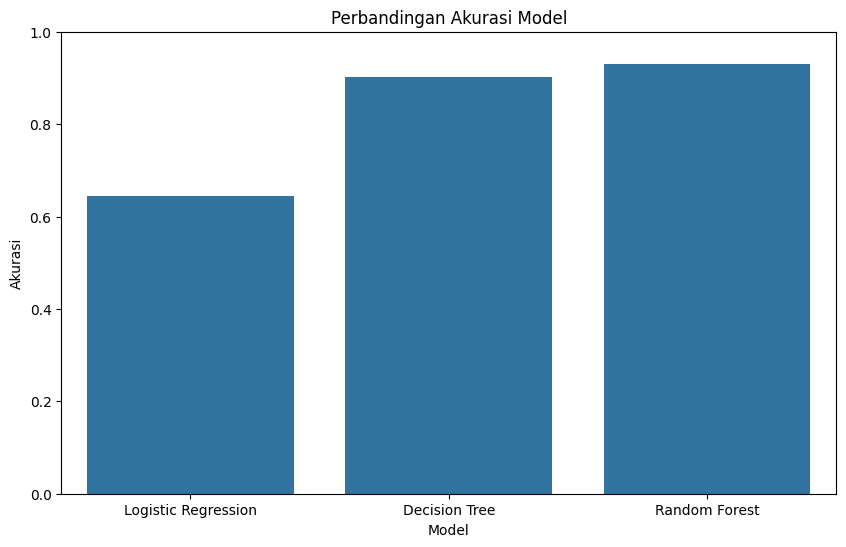

In [ ]:
#Visualisasi hasil perbandingan
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.show()


Melakukan Hyperparameter Tuning untuk Random Forest dengan GridSearchCV...
Parameter terbaik untuk Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Skor akurasi terbaik untuk Random Forest: 0.9482151332293716

Evaluasi Model Random Forest setelah Hyperparameter Tuning
Akurasi: 0.9281842818428184
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       106
           1       0.79      0.94      0.86       111
           2       0.93      0.96      0.95       102
           3       0.98      0.99      0.99       101
           4       0.98      0.98      0.98       107
           5       0.92      0.87      0.89        98
           6       0.93      0.86      0.89       113

    accuracy                           0.93       738
   macro avg       0.93      0.93      0.93       738
weighted avg       0.93      0.93      0.93       738


Melakukan Hyperparameter T

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy
0,Logistic Regression Tuned,0.718157
1,Decision Tree Tuned,0.915989
2,Random Forest Tuned,0.928184


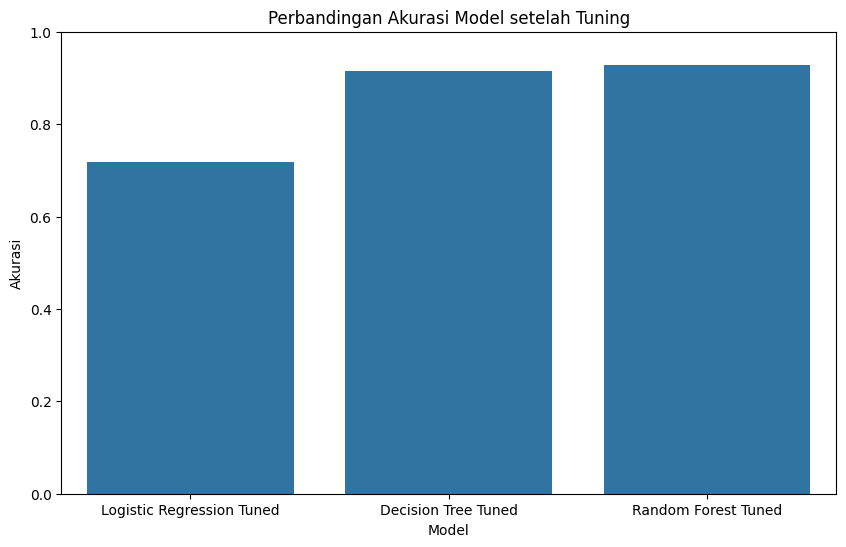

In [ ]:

from sklearn.model_selection import GridSearchCV

print("\nMelakukan Hyperparameter Tuning untuk Random Forest dengan GridSearchCV...")

#definisikan parameter grid untuk RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#inisialisasi GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

#melatih GridSearchCV pada data pelatihan
grid_search_rf.fit(X_train, y_train)

#menampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik untuk Random Forest:", grid_search_rf.best_params_)
print("Skor akurasi terbaik untuk Random Forest:", grid_search_rf.best_score_)

#menggunakan model terbaik untuk prediksi
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

#mengevaluasi model Random Forest yang telah di-tune
print("\nEvaluasi Model Random Forest setelah Hyperparameter Tuning")
print("Akurasi:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

#mendefinisikan parameter grid untuk DecisionTreeClassifier
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#menginisialisasi GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

#melatih GridSearchCV pada data pelatihan
print("\nMelakukan Hyperparameter Tuning untuk Decision Tree dengan GridSearchCV...")
grid_search_dt.fit(X_train, y_train)

#menampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik untuk Decision Tree:", grid_search_dt.best_params_)
print("Skor akurasi terbaik untuk Decision Tree:", grid_search_dt.best_score_)

#menggunakan model terbaik untuk prediksi
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test)

#mengevaluasi model Decision Tree yang telah di-tune
print("\nEvaluasi Model Decision Tree setelah Hyperparameter Tuning")
print("Akurasi:", accuracy_score(y_test, y_pred_dt_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_tuned))


#mendefinisikan parameter grid untuk Logistic Regression (contoh)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 1000, 5000]
}

#inisialisasi GridSearchCV untuk Logistic Regression
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

#melatih GridSearchCV pada data pelatihan
print("\nMelakukan Hyperparameter Tuning untuk Logistic Regression dengan GridSearchCV...")
grid_search_lr.fit(X_train, y_train)

#menampilkan parameter terbaik dan skor terbaik
print("Parameter terbaik untuk Logistic Regression:", grid_search_lr.best_params_)
print("Skor akurasi terbaik untuk Logistic Regression:", grid_search_lr.best_score_)

#mengunakan model terbaik untuk prediksi
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test)

#mengevaluasi model Logistic Regression yang telah di-tune
print("\nEvaluasi Model Logistic Regression setelah Hyperparameter Tuning")
print("Akurasi:", accuracy_score(y_test, y_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))


#menyatukan hasil evaluasi setelah tuning
results_tuned = {
    'Model': ['Logistic Regression Tuned', 'Decision Tree Tuned', 'Random Forest Tuned'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr_tuned), accuracy_score(y_test, y_pred_dt_tuned), accuracy_score(y_test, y_pred_rf_tuned)]
}

results_tuned_df = pd.DataFrame(results_tuned)

print("\nKomparasi Hasil Model setelah Tuning:")
display(results_tuned_df)

#visualisasi hasil perbandingan setelah tuning
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_tuned_df)
plt.title('Perbandingan Akurasi Model setelah Tuning')
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.show()


In [ ]:
#menyatukan hasil evaluasi model sebelum dan sesudah tuning
results_combined = pd.concat([results_df, results_tuned_df], ignore_index=True)

print("Komparasi Hasil Model Sebelum dan Setelah Tuning:")
display(results_combined)

#megevaluasi kembali model terbaik
print("\nEvaluasi Model Terbaik:")

#mengidentifikasi model terbaik berdasarkan akurasi setelah tuning
best_tuned_model_name = results_tuned_df.loc[results_tuned_df['Accuracy'].idxmax()]['Model']

if best_tuned_model_name == 'Logistic Regression Tuned':
    final_best_model = best_lr_model
    y_pred_final = y_pred_lr_tuned
elif best_tuned_model_name == 'Decision Tree Tuned':
    final_best_model = best_dt_model
    y_pred_final = y_pred_dt_tuned
elif best_tuned_model_name == 'Random Forest Tuned':
    final_best_model = best_rf_model
    y_pred_final = y_pred_rf_tuned
else:
    best_untuned_model_name = results_df.loc[results_df['Accuracy'].idxmax()]['Model']
    if best_untuned_model_name == 'Logistic Regression':
        final_best_model = model_lr
        y_pred_final = y_pred_lr
    elif best_untuned_model_name == 'Decision Tree':
        final_best_model = model_dt
        y_pred_final = y_pred_dt
    elif best_untuned_model_name == 'Random Forest':
        final_best_model = model_rf
        y_pred_final = y_pred_rf
    best_tuned_model_name = f"{best_untuned_model_name} (Untuned Best)"


print(f"Model Terbaik: {best_tuned_model_name}")
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Komparasi Hasil Model Sebelum dan Setelah Tuning:


,Model,Accuracy
0,Logistic Regression,0.643631
1,Decision Tree,0.901084
2,Random Forest,0.930894
3,Logistic Regression Tuned,0.718157
4,Decision Tree Tuned,0.915989
5,Random Forest Tuned,0.928184



Evaluasi Model Terbaik:
Model Terbaik: Random Forest Tuned
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       106
           1       0.79      0.94      0.86       111
           2       0.93      0.96      0.95       102
           3       0.98      0.99      0.99       101
           4       0.98      0.98      0.98       107
           5       0.92      0.87      0.89        98
           6       0.93      0.86      0.89       113

    accuracy                           0.93       738
   macro avg       0.93      0.93      0.93       738
weighted avg       0.93      0.93      0.93       738



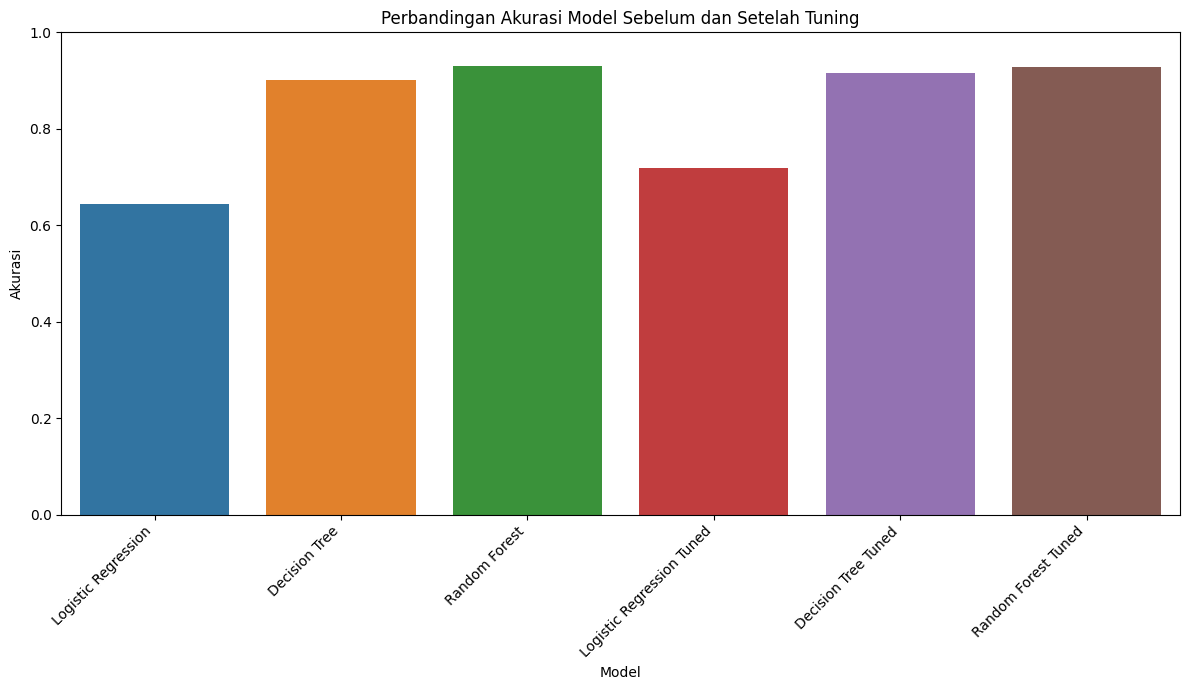

In [ ]:
#memvisualisasi perbandingan performa sebelum dan sesudah optimasi
plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Accuracy', hue='Model', data=results_combined)
plt.title('Perbandingan Akurasi Model Sebelum dan Setelah Tuning')
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()